# Delay exploratory analysis

Note this notebook depends on 4_feature_engineering/1_Delays.ipynb 

In [1]:
# base libraries
import numpy as np
import pandas as pd
import datetime
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set variable from config file
config_path = os.path.abspath('..')

with open(config_path + '/config.json', 'r') as f:
    config = json.load(f)

processing_path = config['DEFAULT']['processing_path']
shipping_filename = config['DEFAULT']['shipping_filename']
delay_filename = config['DEFAULT']['delay_filename']

In [3]:
delays = pd.read_csv(processing_path+delay_filename,header = 0,delimiter = ',')
delays['dt'] = pd.to_datetime(delays["dt"])
delays['ETA_new'] = pd.to_datetime(delays["ETA_new"])
delays.drop_duplicates(subset = ['MMSI','ETA_new'], inplace = True)

In [4]:
delays['HOD'] = delays['dt'].dt.hour + 1
delays['DOW'] = delays['dt'].dt.weekday + 1
delays['MOY'] = delays['dt'].dt.month
delays['arrivalDelayHrs'] = delays['arrivalDelayMin']/60

### Distribution of arrival delay (measured in hours) for all ports
A positive value indicates a late, delayed arrival, whilst a negative value indicates early arrival.

As expected, delays are broadly normally distributed with the median value being located around zero. Just over 43% of ships are subjected to a delay, with 24% of all ships being delayed by an hour or more. This proportion drops to 17%, 12%, 8% and 6% for delays of two, three, four and five hours respectively. 

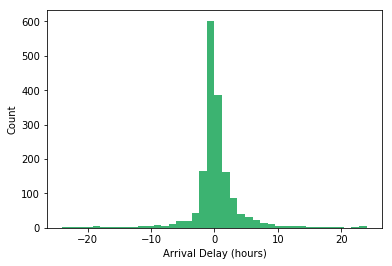

In [5]:
plt.hist(delays['arrivalDelayHrs'],bins=40,range = (-24,24),color = 'mediumseagreen')
plt.xlabel('Arrival Delay (hours)')
plt.ylabel('Count')
plt.show()

### Distribution of arrival delay (measured in hours) for all ports, broken down by day of arrival
A positive value indicates a late, delayed arrival, whilst a negative value indicates early arrival.

When the distribution of arrival delays is plotted for each day the distribution changes little, suggesting that arrival delay is independent of the day of arrival. 

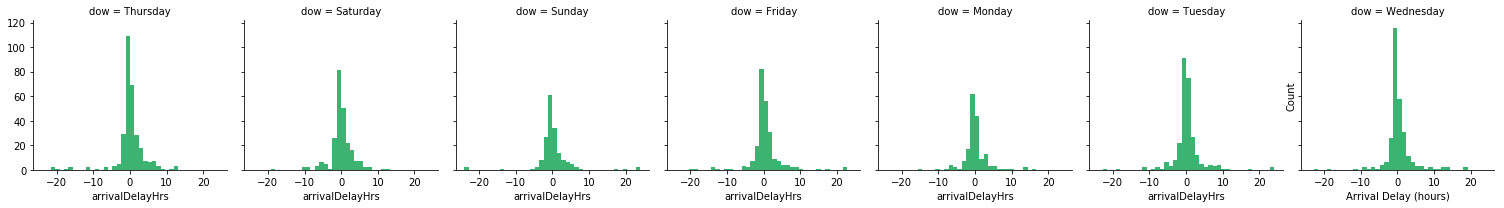

In [6]:
delays['dow'] = delays['DOW'].map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'})
grid = sns.FacetGrid(delays, col='dow')
grid.map(plt.hist, 'arrivalDelayHrs',bins=40,range = (-24,24),color = 'mediumseagreen')
plt.xlabel('Arrival Delay (hours)')
plt.ylabel('Count')
plt.show()

### Distribution of arrival delay (measured in hours) for all ports, broken down by time of arrival
A positive value indicates a late, delayed arrival, whilst a negative value indicates early arrival.

The charts suggest that an effect is evident when broken down by time of the day. Fewer ships are delayed at night time and in the early hours of the day whilst more ships are delayed during the start of the working day.

In [7]:
bins = [0,4,8,9,11,13,17,22,24]
groups = ['22:00 - 04:00','04:00 - 08:00','08:00 - 09:00','09:00 - 11:00','11:00 - 13:00','13:00 - 17:00','17:00 - 22:00','22:00 - 4:00']
delays['time_period'] = pd.cut(delays['HOD'], bins, labels=groups)
delays['time_period'] = delays['time_period'].str.replace('22:00 - 4:00','22:00 - 04:00')

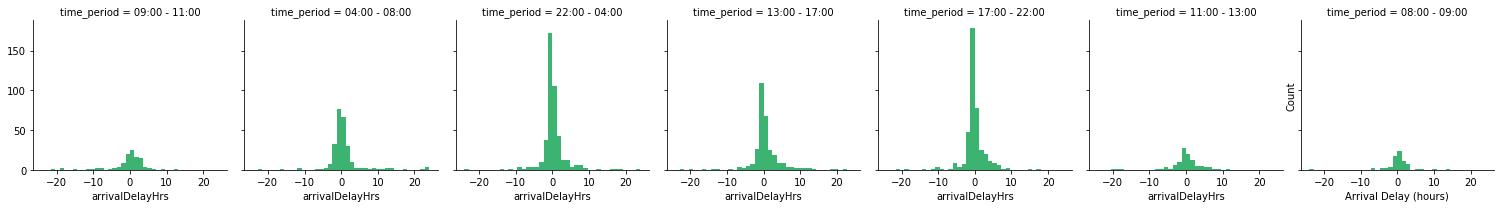

In [8]:
grid = sns.FacetGrid(delays, col='time_period')
grid.map(plt.hist, 'arrivalDelayHrs',bins=40,range = (-24,24),color = 'mediumseagreen')
plt.xlabel('Arrival Delay (hours)')
plt.ylabel('Count')
plt.show()

### Distribution of arrival delay (measured in hours) for all ports, broken down by season of arrival
A positive value indicates a late, delayed arrival, whilst a negative value indicates early arrival.

Fewer ships are delayed in the spring and summer seasons.

In [9]:
#Return the season in which a date falls
def season(dt):
    
    ''' 
    Derives a session for a date
    Parameters
      dt: a date
    Returns a string
    '''
    
    if dt < datetime.date(2016,9,15):
        return 'Summer'
    elif dt < datetime.date(2016,12,15):
        return 'Autumn'
    elif dt < datetime.date(2017,3,15):
        return 'Winter'
    elif dt < datetime.date(2017,6,15):
        return 'Spring'
    else:
        return 'Summer'

In [10]:
delays['season'] = delays.apply(lambda row: season(row['dt'].date()), axis = 1)

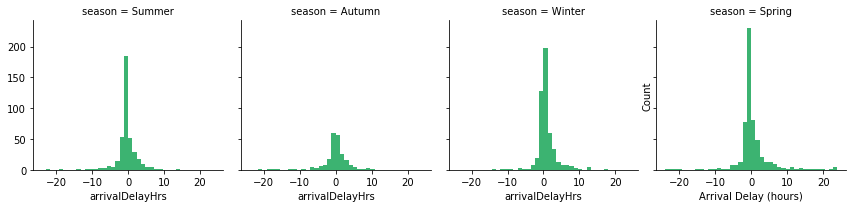

In [11]:
grid = sns.FacetGrid(delays, col='season')
grid.map(plt.hist, 'arrivalDelayHrs',bins=40,range = (-24,24),color = 'mediumseagreen')
plt.xlabel('Arrival Delay (hours)')
plt.ylabel('Count')
plt.show()